### Инициализация библиотек для того чтобы все работало

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

## 1. Набор данных оливковых масел

Часть следующего текста взята из книги rggobi (http://www.ggobi.org/book/). Это отличная книга по визуализации и EDA для классификации, и ее можно бесплатно скачать в формате pdf от Холлис для людей с Гарвардским идентификатором. Несмотря на то, что в книге используется ggobi, многое из того же анализа можно сделать в Mondrian или непосредственно в Matplotlib / Pandas (хотя и не в интерактивном режиме).

<hr/>

"The Olive Oils data has eight explanatory variables (levels of fatty acids in the oils) and nine classes (areas of Italy). The goal of the analysis is to develop rules that reliably distinguish oils from the nine different areas. It is a problem of practical interest, because oil from some areas is more highly valued and unscrupulous suppliers sometimes make false claims about the origin of their oil. The content of the oils is a subject of study in its own right: Olive oil has high nutritional value, and some of its constituent fatty acids are considered to be more beneficial than others."

google перевод:
«Данные по оливковым маслам имеют восемь объясняющих переменных (уровень жирных кислот в маслах) и девять классов (районы Италии). Цель анализа - разработать правила, которые надежно отличают масла от девяти различных областей. Это проблема представляет практический интерес, потому что нефть из некоторых областей более ценится, а недобросовестные поставщики иногда делают ложные заявления о происхождении своего масла. Содержание масел является предметом самостоятельного изучения: оливковое масло имеет высокую пищевую ценность, и некоторые из составляющих его жирных кислот считаются более полезными, чем другие ".

Кроме того, содержание жирных кислот зависит от климата: эта информация важна при принятии решения о том, какие сорта выращивать и где.

"источник: Forina, M., Armanino, C., Lanteri, S. & Tiscornia, E. (1983), Classification of Olive Oils from their Fatty Acid Composition, in Martens, H. and
Russwurm Jr., H., eds, Food Research and Data Analysis, Applied Science
Publishers, London, pp. 189–214. It was brought to our attention by Glover
& Hopke (1992).

Число строк: 572

число переменных: 10

Описание: Эти данные содержат процентный состав жирных кислот, найденных в липидной фракции итальянских оливковых масел. Данные получены из исследования, чтобы определить подлинность оливкового масла ".
<hr/>

In [ ]:
from IPython.display import Image
Image(filename='Italy.png')

При работе с pandas и matplotlib я не всегда помню синтаксис. Программист - хороший инструмент для преобразования фрагментов Stack Overflow в код. Я почти всегда пишу то, что я пытаюсь сделать, в Google и начинаю работу оттуда.

Тем не менее, я нашел следующие ссылки очень полезными для понимания режима Pandas, как это все работает.

* http://blog.yhathq.com/posts/R-and-pandas-and-what-ive-learned-about-each.html
* http://www.bearrelroll.com/2013/05/python-pandas-tutorial/
* http://manishamde.github.io/blog/2013/03/07/pandas-and-python-top-10/

## 2. Загрузка и выравнивание данных

Давайте загрузим файл в pandas датасет и посмотрим первые 5 строк

 Этот набор данных состоит из процентного содержания 
 This data set consists of the percentage composition of 8 fatty acids
 (palmitic, palmitoleic, stearic, oleic, linoleic, linoleic, linolenic,
 arachidic, eicosenoic) found in the lipid fraction of 572 Italian olive
 oils. For further information on this data set see Chapter 10 (pages
 176-189) of the book by J. Zupan, and J. Gasteiger, {\em Neural
 Networks in Chemistry and Drug Design}. There are 9 collection areas, 4
 from southern Italy (North and South Apulia, Calabria and Sicily), two
 from Sardinia (inland and coastal) and 3 from northern Italy (Umbria,
 East and West Liguria).
 
 
591/5000
Этот набор данных состоит из процентного состава 8 жирных кислот
  (пальмитиновая, пальмитолеиновая, стеариновая, олеиновая, линолевая, линолевая, линоленовая,
  арахидная, эйкозеновая) обнаруженных в липидной фракции 572 видов итальянского оливкового масла. 
  Для получения дополнительной информации об этом наборе данных см. Главу 10 (страницы
  176-189) книги Дж. Зупана и Дж. Гастайгера, {\ em Neural
 Networks in Chemistry and Drug Design}. Есть 9 областей где производят масло, 4
  из южной Италии (Северная и Южная Апулия, Калабрия и Сицилия), два
  из Сардинии (внутренней и прибрежной) и 3 из северной Италии (Умбрия,
  Восточная и Западная Лигурия).



Переменные описываются в следующем виде: 
   1. Region (1=South, 2=Sardinia, 3=North) 
   2. Area (1=North Apulia, 2=Calabria, 3=South Apulia, 4=Sicily, 5=Inland Sardinia, 6=Coastal Sardinia, 7=Umbria, 8=East Liguria, 9=West Liguria 
   3. palmitic acid (% in sample) 
   4. palmitoleic acid 
   5. stearic acid 
   6. oleic acid 
   7. linoleic acid 
   8. linolenic acid 
   9. arachidic acid 
   10. eicosenoic acid 

In [ ]:
type(pd.read_csv("olive.csv"))

In [4]:
df=pd.read_csv("olive.csv")
df

,Unnamed: 0,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46
...,...,...,...,...,...,...,...,...,...,...,...
567,568.West-Liguria,3,8,1280,110,290,7490,790,10,10,2
568,569.West-Liguria,3,8,1060,100,270,7740,810,10,10,3
569,570.West-Liguria,3,8,1010,90,210,7720,970,0,0,2
570,571.West-Liguria,3,8,990,120,250,7750,870,10,10,2


Давайте переименуем некрасивый первый столбец

*Подсказка*: Поиск в гугле по запросу 'python pandas dataframe rename' приведет вас к этой <a href="http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.rename.html">документации</a>.

In [53]:
print(df.columns)
df.rename(columns={df.columns[0]:'areastring'}, inplace=True)
df.columns

Index(['Unnamed: 0', 'region', 'area', 'palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic'], dtype='object')


Index(['areastring', 'region', 'area', 'palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic'], dtype='object')

Давайте проверим какие уникальные регионы и зоны хранятся в наборе данных

In [ ]:
print('regions\t', df.region.unique())
print('areas\t', df.area.unique())

Давайте построим *crosstab*уляцию или таблицу пересечения двух факторов.

*Подсказка*: Поиск в гугл по запросу 'python pandas cross tabulation' приведет вас к этой <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html">документации</a>.


In [ ]:
pd.crosstab(df.area, df.region)

Нужно ли нам как-то преобразовать набор данных перед тем как мы начнем с ним работать? Давайте посмотрим.

In [ ]:
df.head()

Давайте избавимся от лишних цифр в `df.areastring`. Для одного столбца Pandas Series можно использовать `map`. Здесь <a href="https://pandas.pydata.org/pandas-docs/version/0.25/reference/api/pandas.Series.map.html">документация</a>.

In [ ]:
df.areastring=df.areastring.map(lambda x: x.split('.')[-1])
df.head()

Для доступа к специфическому подмножеству данных мы можем использовать список полей

In [ ]:
df[['palmitic','oleic']].head()

Учтите что это вернет новый объект типа DataFrame.

Чтобы получить доступ к записям одного стоблца (тип Series) мы можем сделать следующее

In [ ]:
print(df['palmitic'])

Обратите внимание на разницу в синтаксисе. В первом примере, где мы использовали индексирование списка, мы получили новый DataFrame. Во втором примере мы получили Series, соответствующую столбцу.

In [ ]:
print("type of df[['palmitic']]:\t", type(df[['palmitic']]))
print("type of df['palmitic']:\t\t", type(df['palmitic']))

Для более удобного доступа к ряду значений одного столбца мы можем сделать так:

In [ ]:
df.palmitic

### Самостоятельное задание (5 минут)

Получите уникальные areastring из фрейма данных `df`.

In [ ]:
#ваш код

Создайте новый DataFrame `dfsub` взяв список кислот и применив функцию `apply` для деления всех значений на 100.

Если не знакомы с функцией `apply`, поищите в Google по запросу 'python pandas dataframe apply'. Это приведет к <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html">документации</a>

In [8]:
acidlist=['palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic']

#ваш код

Обратите внимание, что мы можем заменить часть dataframe этим новым dataframe. Поскольку нам нужны проценты, давайте сделаем это. Процент `Oleic` должен быть в районе 70-80, если вы все сделали правильно.

In [ ]:
df[acidlist]=dfsub
df.head()

## 2. Короткое введение в Matplotlib

Это просто быстрое вступление. Пожалуйста, прочитайте отличный учебник <a href="http://nbviewer.ipython.org/urls/raw.github.com/jrjohansson/scientific-python-lectures/master/Lecture-4-Matplotlib.ipynb">тут</a>.

Text(0, 0.5, 'linolenic')

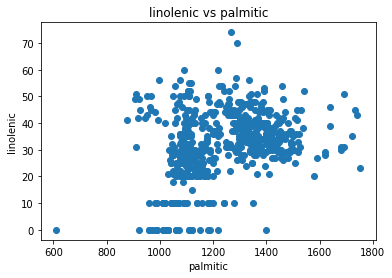

In [44]:
fig=plt.figure()
plt.scatter(df.palmitic, df.linolenic)
axis = fig.gca() #get current axis
axis.set_title('linolenic vs palmitic')
axis.set_xlabel('palmitic')
axis.set_ylabel('linolenic')
#fig can be got with fig.gcf()

Либо более короткий синтаксис

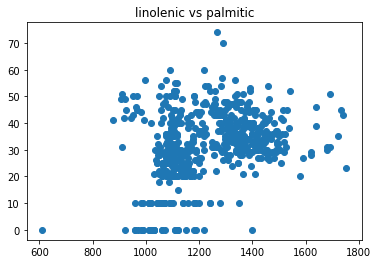

In [45]:
plt.title('linolenic vs palmitic')
plt.scatter(df.palmitic, df.linolenic)

(array([  1.,   0.,  11.,  71., 188.,  79., 131.,  73.,   9.,   9.]),
 array([ 610. ,  724.3,  838.6,  952.9, 1067.2, 1181.5, 1295.8, 1410.1,
        1524.4, 1638.7, 1753. ]),
 <a list of 10 Patch objects>)

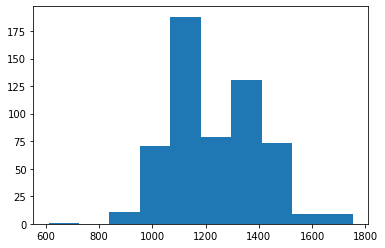

In [46]:
plt.hist(df.palmitic)

Доступно много других типов графиков

В более объектно-ориентированном подходе мы используем функцию `subplots` для установки текущего рисунка и оси.

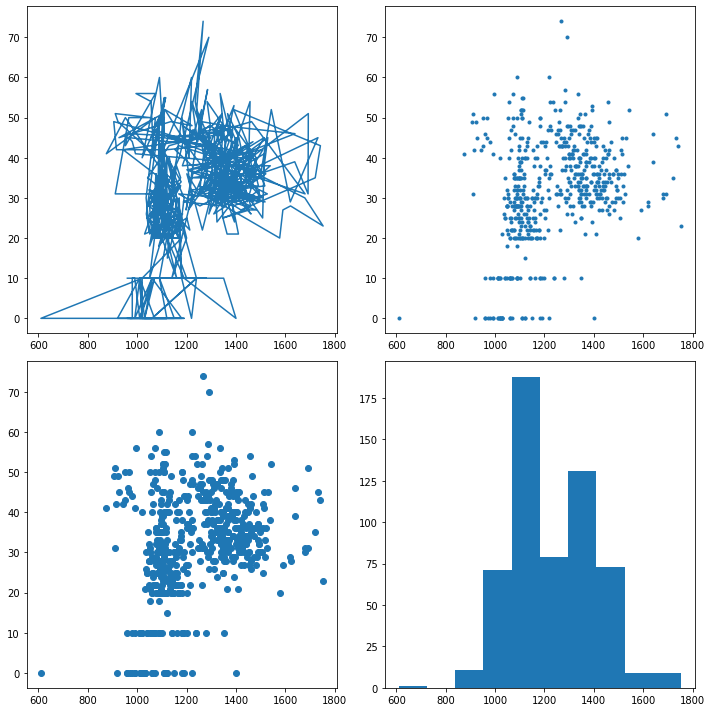

In [47]:
fig, axes=plt.subplots(figsize=(10,10), nrows=2, ncols=2)
axes[0][0].plot(df.palmitic, df.linolenic)
axes[0][1].plot(df.palmitic, df.linolenic, '.')
axes[1][0].scatter(df.palmitic, df.linolenic)
axes[1][1].hist(df.palmitic)
fig.tight_layout()

### Самостоятельное задание (5 минут)

Составьте диаграммы рассеяния кислот в списке `yacids` против кислот в списке` xacids`. Как следует из названий, нанесите кислоты в `yacids` вдоль оси y и кислоты в` xacids` вдоль оси x. Пометьте оси соответствующим названием кислот. Установите его в виде сетки с 3 рядами и 2 столбцами. Должно получиться так:

<img src="scatterplot_example.png">

In [ ]:
xacids=['oleic','linolenic','eicosenoic']
yacids=['stearic','arachidic']

#ваш код

## 3. Обработка данных Pandas

Первая концепция, с которой мы имеем дело, это пандавский `groupby`. Идея состоит в том, чтобы сгруппировать фрейм данных по значениям определенной переменной. Документацию можно найти <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html">здесь</a>.

In [5]:
region_groupby = df.groupby('region')
print(type(region_groupby))
region_groupby.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,Unnamed: 0,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46
323,324.Inland-Sardinia,2,5,1129,120,222,7272,1112,43,98,2
324,325.Inland-Sardinia,2,5,1042,135,210,7376,1116,35,90,3
325,326.Inland-Sardinia,2,5,1103,96,210,7380,1085,32,94,3
326,327.Inland-Sardinia,2,5,1118,97,221,7279,1154,35,94,2
327,328.Inland-Sardinia,2,5,1052,95,215,7388,1126,31,92,1


Функция `groupby` предоставляет вам словарь-подобный объект, ключами которого являются значения фактора (по которому группируем), а значениями являются соответствующие подмножества dataframe.

In [ ]:
for key, value in region_groupby:
    print("( key, type(value) ) = (", key, ",", type(value), ")")
    v=value

v.head()

Функция `groupby` также действует как объект, который может быть **mapped**. После того, как сопоставление завершено, строки объединяются (**reduced**) в больший dataframe. Например, используя функцию `describe`. Документацию по функции `describe` можно найти <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html">здесь</a>.

In [ ]:
dfrd=region_groupby.describe()
print(type(dfrd))
dfrd.head(20)

Таким образом, можно выполнить итерацию по groupby 'dictionary', получить pandas series из каждого под-dataframe и вычислить стандартное отклонение, используя функцию `std` (документация по `std` <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html">здесь</a>):

In [ ]:
vecs=[]
keys=[]
for key, value in region_groupby:
    k=key
    v=value.std()
    print(k, type(v), "\n", v, "\n")

Или можно позволить pandas позаботиться о конкатенации полученных серий, запустив `std` на гуппированном dataframe. Обратите внимание, что выходной фрейм данных автоматически индексируется по регионам!

In [10]:
dfbystd=df.groupby('region').std()
dfbystd.head()

,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,
1,0.741054,152.934872,50.723686,39.870851,345.143066,210.673018,7.972709,11.164430,8.391528
2,0.475023,40.411059,13.851429,17.636272,141.878268,107.233554,5.384374,11.882609,0.743582
3,0.820542,82.563513,26.438785,38.956047,164.815525,143.122578,16.886527,29.358573,0.729813


Или можно использовать `aggregate` для передачи произвольной функции в sub-dataframe. Функция применяется по столбцам.

In [6]:
dfbymean=region_groupby.aggregate(np.mean)
dfbymean.head()

,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,
1,2.783282,1332.287926,154.801858,228.773994,7100.009288,1033.498452,38.065015,63.117647,27.321981
2,5.336735,1111.346939,96.744898,226.183673,7268.020408,1196.530612,27.091837,73.173469,1.938776
3,8.006623,1094.801325,83.735099,230.801325,7793.052980,727.033113,21.788079,37.576159,1.973510


In [33]:
region_groupby.aggregate(lambda x: x.palmitic.sum()) #просто, правда? :-)

,Unnamed: 0,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,,
1,430329,430329,430329,430329,430329,430329,430329,430329,430329,430329
2,108912,108912,108912,108912,108912,108912,108912,108912,108912,108912
3,165315,165315,165315,165315,165315,165315,165315,165315,165315,165315


Или можно использовать `apply` для передачи произвольной функции в sub-dataframe. Функция принимает dataframe в качестве аргумента.

In [7]:
region_groupby.apply(lambda f: f.mean())

,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,,
1,1.0,2.783282,1332.287926,154.801858,228.773994,7100.009288,1033.498452,38.065015,63.117647,27.321981
2,2.0,5.336735,1111.346939,96.744898,226.183673,7268.020408,1196.530612,27.091837,73.173469,1.938776
3,3.0,8.006623,1094.801325,83.735099,230.801325,7793.052980,727.033113,21.788079,37.576159,1.973510


In [ ]:
region_groupby.apply(lambda f: f.palmitic.mean())

Давайте переименуем столбцы в `dfbymean` и `dfbystd`.

In [11]:
renamedict_std={k:k+"_std" for k in acidlist}
renamedict_mean={k:k+"_mean" for k in acidlist}
dfbystd.rename(inplace=True, columns=renamedict_std)
dfbymean.rename(inplace=True, columns=renamedict_mean) 
dfbystd.head()

,area,palmitic_std,palmitoleic_std,stearic_std,oleic_std,linoleic_std,linolenic_std,arachidic_std,eicosenoic_std
region,,,,,,,,,
1,0.741054,152.934872,50.723686,39.870851,345.143066,210.673018,7.972709,11.164430,8.391528
2,0.475023,40.411059,13.851429,17.636272,141.878268,107.233554,5.384374,11.882609,0.743582
3,0.820542,82.563513,26.438785,38.956047,164.815525,143.122578,16.886527,29.358573,0.729813


In [ ]:
dfbymean.head()

Pandas может делать общие слияния. Когда данные поставляются с индексом, можно использовать `join` (<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html">документация</a>). Здесь мы создаем два sub-dataframes и объединяем их по общему индексу региона.

In [14]:
dfpalmiticmean = dfbymean[['palmitic_mean']] 
dfpalmiticstd = dfbystd[['palmitic_std']] 

newdfbyregion=dfpalmiticmean.join(dfpalmiticstd)
newdfbyregion.head()

,palmitic_mean,palmitic_std
region,,
1,1332.287926,152.934872
2,1111.346939,40.411059
3,1094.801325,82.563513


### Самостоятельное задание (10 minutes)

Давайте поставим веса содержания пальмитиновых кислот случайным образом (случайные коэффициенты). Сначала мы извлечем подмножество столбцов из `df`, а затем напишем функцию для присваивания весов пальмитинового содержимого по этому случайному весу, предоставляя взвешенное пальмитинское среднее значение в конечном dataframe.

In [15]:
df.shape

(572, 11)

In [24]:
np.random.seed(1)
weights=np.random.uniform(size=df.shape[0])
print("weights:\n", weights)

smallerdf=df[['palmitic']]
otherdf=df[['region']].copy()
otherdf['weight'] = weights
otherdf.head()

weights:
 [4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
 1.46755891e-01 9.23385948e-02 1.86260211e-01 3.45560727e-01
 3.96767474e-01 5.38816734e-01 4.19194514e-01 6.85219500e-01
 2.04452250e-01 8.78117436e-01 2.73875932e-02 6.70467510e-01
 4.17304802e-01 5.58689828e-01 1.40386939e-01 1.98101489e-01
 8.00744569e-01 9.68261576e-01 3.13424178e-01 6.92322616e-01
 8.76389152e-01 8.94606664e-01 8.50442114e-02 3.90547832e-02
 1.69830420e-01 8.78142503e-01 9.83468338e-02 4.21107625e-01
 9.57889530e-01 5.33165285e-01 6.91877114e-01 3.15515631e-01
 6.86500928e-01 8.34625672e-01 1.82882773e-02 7.50144315e-01
 9.88861089e-01 7.48165654e-01 2.80443992e-01 7.89279328e-01
 1.03226007e-01 4.47893526e-01 9.08595503e-01 2.93614148e-01
 2.87775339e-01 1.30028572e-01 1.93669579e-02 6.78835533e-01
 2.11628116e-01 2.65546659e-01 4.91573159e-01 5.33625451e-02
 5.74117605e-01 1.46728575e-01 5.89305537e-01 6.99758360e-01
 1.02334429e-01 4.14055988e-01 6.94400158e-01 4.14179270e-01
 4.99534589e-0

,region,weight
0,1,0.417022
1,1,0.720324
2,1,0.000114
3,1,0.302333
4,1,0.146756


Объединим (join) `smallerdf` и `otherdf` по индексу, в smallerdf

In [29]:
#ваш код тут
newotherdf = smallerdf.join(otherdf)
newotherdf

,palmitic,region,weight
0,1075,1,0.417022
1,1088,1,0.720324
2,911,1,0.000114
3,966,1,0.302333
4,1051,1,0.146756
...,...,...,...
567,1280,3,0.914789
568,1060,3,0.644361
569,1010,3,0.005240
570,990,3,0.484428


Теперь давайте используем эти веса для вычисления средневзвешенного значения по колонке palmitic.

Должно получиться примерно так:
```
region
1    13.380473
2    11.090359
3    10.946297
dtype: float64
```

In [32]:
#ваш код тут
newotherdf.groupby('region').palmitic.std()

region
1    152.934872
2     40.411059
3     82.563513
Name: palmitic, dtype: float64

Наконец, обработаем (aggregate) проценты столбцов, суммируя их по регионам.
Можно использовать region_groupby переменную

In [37]:
#ваш код тут
newotherdf.groupby('region').aggregate(lambda x: x.weight.sum())

,palmitic,weight
region,,
1,163.779553,163.779553
2,50.910572,50.910572
3,73.861802,73.861802


## Одномерный Exploratory Data Analysis (EDA) в Pandas

In [49]:
rkeys=[1,2,3]
rvals=['South','Sardinia','North']
rmap={e[0]:e[1] for e in zip(rkeys,rvals)}
rmap

{1: 'South', 2: 'Sardinia', 3: 'North'}

Давайте получим dataframe только с кислотами.

In [39]:
mdf2=df.groupby('region').aggregate(np.mean)
mdf2=mdf2[acidlist]
mdf2.head()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,
1,1332.287926,154.801858,228.773994,7100.009288,1033.498452,38.065015,63.117647,27.321981
2,1111.346939,96.744898,226.183673,7268.020408,1196.530612,27.091837,73.173469,1.938776
3,1094.801325,83.735099,230.801325,7793.052980,727.033113,21.788079,37.576159,1.973510


Давайте сделаем гистограмму относительного среднего процентного содержания кислот. В pandas это делается вот так просто:

(0, 100)

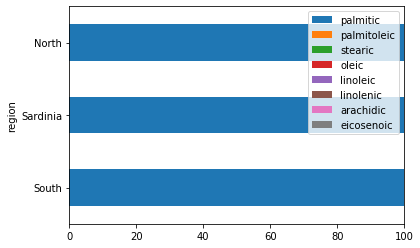

In [48]:
ax=mdf2.plot(kind='barh', stacked=True)
ax.set_yticklabels(rvals)
ax.set_xlim([0,100])

Ну, это некрасиво. Давайте нарисуем красивее.

### Самостоятельная работа (10 минут)

Вы можете видеть, что oleic доминирует, и не позволяет нам видеть многое о других кислотах. Удалите его, и давайте снова нарисуем графики.

           palmitic  palmitoleic     stearic     linoleic  linolenic  arachidic
region                                                                         
1       1332.287926   154.801858  228.773994  1033.498452  38.065015  63.117647
2       1111.346939    96.744898  226.183673  1196.530612  27.091837  73.173469
3       1094.801325    83.735099  230.801325   727.033113  21.788079  37.576159


(0, 100)

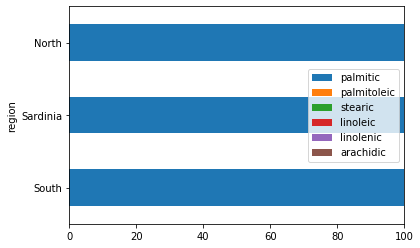

In [52]:
acidlistminusoleic=['palmitic', 'palmitoleic', 'stearic', 'linoleic', 'linolenic', 'arachidic']

mdf2=df.groupby('region').aggregate(np.mean)
mdf2=mdf2[acidlistminusoleic]
print(mdf2.head())

ax=mdf2.plot(kind='barh', stacked=True)
ax.set_yticklabels(rvals)
ax.set_xlim([0,100])
#ваш код тут


**Обратите внимание, что в регионах 1 и 2 нет eicosenoic кислот, соответственно это Сардиния и Север, соответственно**